# Statistiques inférentielles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

# 1. Pourquoi des statistiques ?

# 2. Première Analyse

### 2.1. Moyenne
$n$ nombre d'échantilllons, 
$$
\overline{X} = \frac{X_1+X_2...+X_n}{n}
$$

Très intuitif

__MAIS__ ne suffit pas à conclure (exemple de _Surf island_).

### 2.2. l'étendue
$$
\text{étendue} = max(X_i) - min(X_i)
$$

Permet de caractériser les extrèmes.

### 2.3. Variance
 
$n$ nombre d'échantilllons, 

##### 2.3.a. Variance constatée $\sigma^{2}$
$$
Var = \sigma^{2} = \frac{(X_1-\overline{X})^{2}+(X_2-\overline{X})^{2}...+(X_n-\overline{X})^{2}}{n}
$$

##### 2.3.b. Variance estimée $s^{2}$
$$
s^{2} = \frac{(X_1-\overline{X})^{2}+(X_2-\overline{X})^{2}...+(X_n-\overline{X})^{2}}{n-1}
$$

Le __dénominateur__ change.

### 2.4. Écart-type

$$
s = \sqrt{s^{2}}
$$
Exprimé dans la même unité que les observations.
Vous pouvez donc _grosso  modo_ considérer l’écart type comme __l’écart__ qu'on observera en __moyenne__ entre une donnée prise au hasard dans votre échantillon (et, par extension, dans la population) et la moyenne des données.

### 2.5. L'erreur standard de la moyenne
$$
s.e. = \sqrt{\frac{s^{2}}{n}}
$$

Écart type de la moyenne 

__Attention__: généralement cette erreur donne des fourchettes 2 fois plus petites que les intervalles de confiance


### 2.6. L'erreur standard d'une proportion (d'un pourcentage)

$$
s.e. = \sqrt{\frac{p(1-p)}{n-1}}
$$

__Attention__: généralement cette erreur donne des fourchettes 2 fois plus petites que les intervalles de confiance


#### Exemple :

In [2]:
X = pd.Series([1,2,3,6])
desc = X.describe()
print(desc)

print("{:=^60}".format(""))
n = len(X)
mean = X.mean()
print("{:<8} {:f}".format("moyenne", mean))
etendue = X.max() - X.min()
print("{:<8} {:f}".format("étendue", etendue))
sigma2 = ((X - X.mean()) ** 2).sum() / n
print("{:<8} {:f}".format("sigma2", sigma2))
s2 = ((X - X.mean()) ** 2).sum() / (n - 1)
print("{:<8} {:f}".format("s2", s2))
s = np.sqrt(s2)
print("{:<8} {:f}".format("s", s))
es = np.sqrt(s2/n)
print("{:<8} {:f}".format("e.s.", es))

print("La moyenne est donc de {} +- {:.2}".format(mean, es))

count    4.000000
mean     3.000000
std      2.160247
min      1.000000
25%      1.750000
50%      2.500000
75%      3.750000
max      6.000000
dtype: float64
moyenne  3.000000
étendue  5.000000
sigma2   3.500000
s2       4.666667
s        2.160247
e.s.     1.080123
La moyenne est donc de 3.0 +- 1.1


# 3. Histogramme :

### Résumé :

- Regarder l'histogramme
- Chercher différents modes
- Ne pas faire confiance à l'esprit humain pour choisir aléatoirement.

# 4. Modifier les données

### Résumé :

- Éliminer les outliers
- transformation affine
- transformation plus complexe (log, sqrt, ...)

| Variable aléatoire | Moyenne | Variance |
|--------------------|---------|----------|
| $X$ | $\mu$ | $\sigma^{2}$ | 
| $X - \mu$ | $0$ | $\sigma^{2}$ | 
| $X/\sigma$ | $\mu/\sigma$ | $1$ | 
| $(X-\mu)/\sigma$ | $0$ | $1$ | 

L'opération figurant sur la deuxième ligne consiste à retrancher à chaque donnée la moyenne $\mu$ et s’appelle un __centrage__.
L'opération figurant sur la troisième ligne consiste à diviser toutes les valeurs par l'écart-type et  s’appelle une __réduction__.
La combinaison du centrage et de la réduction (quatrième ligne du tableau) donne une variable __centrée-réduite__.

# 5. Quelques lois à connaître

## 5.1. La loi binomiale (positive)

On réalise $n$ tirages d'une variable aléatoire à 2 valeurs possibles _mutuellement exclusives_. La probabilité 1 est $p$, la possibilité 2 est notée $q = (1-p)$

La possibilité d'avoir _exactement_ $k$ sur $n$ tirages avec la valeur 1 vaut :

$$
P(X=k) = C_n^{k} . p^{k} . q^{n-k}
$$

avec $C_n^{k} = \frac{n!}{k!(n-k)!}$

La moyenne (si l'échantillon est très grand) vaut $\mu = n.p$.

La variance (si l'échantillon est très grand) vaut $\sigma^{2} = n.p.(1-p)$.

##### Exemple : Note d'un QCM avec 20 questions à 4 réponses (1 points/questions) avec réponse au hasard

La moyenne est à 0.04761904761904755


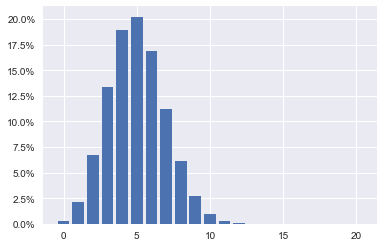

In [3]:
from scipy.stats import binom
import matplotlib.ticker as mtick
n = 20; p = 0.25
x = np.arange(21)
plt.bar(x, binom.pmf(x, n, p))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
print("La moyenne est à {}".format(binom.pmf(x, n, p).mean()))

## 5.2. La loi de Pascal (ou binomiale négative)

On se place avec une variable aléatoire à 2 valeurs possibles _mutuellement exclusives_. La probabilité 1 est $p$, la possibilité 2 est notée $q = (1-p)$

On souhaite connaître le nombre $k$ de tirages nécessaire pour obtenir exactement $r$ tirages de la valeur 1.

$$
P(X=k) = C_{k-1}^{r-1} . p^{r} . q^{k-r}
$$

##### Exemple : Nombre de tentatives nécessaires pour 'attraper' 3 proies avec 25 % de chances de serrer à chaque essai.

mean     9.0
var      36.0


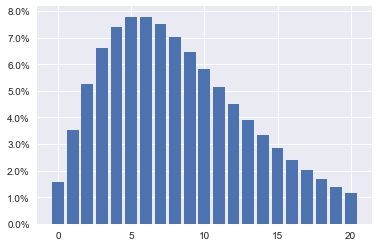

In [4]:
from scipy.stats import nbinom
r = 3; p = 0.25
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.bar(x, nbinom.pmf(x, r, p))
mean, var, skew, kurt = nbinom.stats(r, p, moments='mvsk')
print("{:<8} {}".format("mean", mean))
print("{:<8} {}".format("var", var))

## 5.3. La loi Normale $\mathcal{N}(0,1)$

Loi continue dont la fonction de densité de probabilité vaut :
$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}.e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}
$$

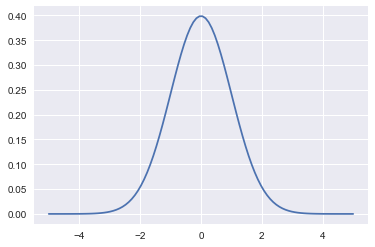

In [5]:
from scipy.stats import norm
x = np.linspace(-5, 5, 100)
plt.plot(x, norm.pdf(x))

## Théorème Centrale Limite

Soient $X_1, X_2 ... X_n$ $n$ variables aléatoires qui:
- sont _indépendantes_ deux à deux
- distribuées selon la même densité de probabilité
$$
\text{On pose}
$$
$$
Y = X_1 + X_2 ... + X_n
$$
$$
Z = \frac{Y-n\mu}{\sqrt{n\sigma^{2}}}
$$


$$
\text{Alors, }Z\rightarrow\mathcal{N}(0,1)\text{ quand }n\text{ tend vers l'infini.} 
$$

En gros : __Une moyenne suit une loi approximativement normale dès lors qu’elle est établie à partir d'un échantillons d'une trentaine d'individus ou plus__.

# 6. Les intervalles de confiance

On n'a pas accès aux véritables paramètre (moyenne, variance) du phénomène observé. On se contente du paramètre des observations.

_Jusqu'à quel point peut-on se fier aux valeurs estimées à partir de l'échantillon ?_

La réponse s'obtient grâce aux intervalles de confiance.

L'intervalle de confiance définie la zone dans laquelle se trouve _très probablement (on choisit cette valeur)_ la véritable valeur du paramètre.


## 6.1. Intervalle de confiance d'une moyenne

### 6.1.1. Cas 1: Grand échantillon (n > 30), loi quelconque
Grâce au Théorème Centrale Limite on sait que la moyenne suit une loi normale $\mathcal{N}(\mu, \sigma^{2}/n)$, avec $\mu$ moyenne de la loi quelconque et $\sigma^{2}$ variance de la loi quelconque.

$$
m\rightarrow\mathcal{N}(\mu, \sigma^{2}/n)
$$

Comme l'échantillon est grand, on peut remplacer $\sigma^{2}$ par $s^{2}$ la variance observée.

$$
m\rightarrow\mathcal{N}(\mu, s^{2}/n)
$$

Or une loi normale a 95% de ces valeurs dans l'intervalle $\pm 1.96$ écarts-types autour de la moyenne (calcul cellule ci-dessous). L'écart-type de la moyenne est _l'erreur standard_ 

$$
s_m = e.s. = \sqrt{s^{2}/n}
$$

Donc $\mu$ est dans l'intervalle (à 95% de chance) :

$$
\mu = m\pm1.96\sqrt{\frac{s^{2}}{n}}
$$


__Exemple : Taille de 40 garçons, $m = 178.025 cm$, $s^{2} = 50.384$. Quel intervalle de confiance pour la moyenne ?__

In [6]:
n = 40; m = 178.025; s2 = 50.384
es = np.sqrt(s2/n)
print("L'intervalle de confiance à 5% est [{:5.2f} ; {:5.2f}]".format(m-1.96*es, m+1.96*es))

L'intervalle de confiance à 5% est [175.83 ; 180.22]


In [7]:
for alpha in [0.05, 0.01]:
    print("Pour alpha = {:.0%}, il faut regarder à plus ou moins {:.2f} écart-type.".format(alpha, norm.ppf(1-alpha/2)))

Pour alpha = 5%, il faut regarder à plus ou moins 1.96 écart-type.
Pour alpha = 1%, il faut regarder à plus ou moins 2.58 écart-type.


### 6.1.2. Cas 2: Petit échantillon, loi normale

Si la variable suit une loi normale alors pas besoin de remplacer.

$$
m\rightarrow\mathcal{N}(\mu, \sigma^{2}/n)
$$

__MAIS__ on ne peut pas remplacer $\sigma^2$ par $s^2$ comme dans le cas précédent sans prendre le risque de _sous estimer_ fortement l'inervalle de confiance.

On s'intéresse à la variable centrée, réduite, $t$ (Student-Fisher):

$$
t = \frac{m - \mu}{\sqrt{\frac{s^2}{n}}}
$$

Les valeurs sont consignées dans une table. À chaque valeur de $n-1$ (nombre de dégrés de liberté) correspond une colonne. On a la formule :

$$
\mu = m\pm t_{n-1, 1-\alpha/2}\sqrt{\frac{s^{2}}{n}}
$$

__Exemple : Taille 10 garçons, $m=178.025$, $s^2=50.384$. Intervalle de confiance sur la moyenne ?__

In [8]:
from scipy.stats import t

n = 10; m = 178.025; s2 = 50.384; alpha = 0.05
es = np.sqrt(s2/n)
t_ = t.ppf(1-alpha/2, n-1)
print("L'intervalle de confiance à 5% est [{:5.2f} ; {:5.2f}]".format(m-t_*es, m+t_*es))

L'intervalle de confiance à 5% est [172.95 ; 183.10]


### 6.1.3. Cas 3: Petit échantillon, loi quelconque 

__ voir Bootstrap __

## 6.2. Intervalle de confiance d'un pourcentage (d'une proportion)

### 6.2.1. Cas 1: Grand échantillon ($np > 5$, $nq > 5$)

Grâce au Théorème Centrale Limite on sait que la moyenne suit une loi normale $\mathcal{N}(\mu, \sigma^{2}/n)$, avec $\mu$ moyenne de la loi quelconque et $\sigma^{2}$ variance de la loi quelconque.

$$
m\rightarrow\mathcal{N}(\mu, \sigma^{2}/n)
$$

or $m=p_{obs}$ et $\sigma = s^2 = n.pq$ donc on a

$$
p_{obs}\rightarrow\mathcal{N}(\mu, \frac{pq}{n})
$$

On peut replacer la variance exacte $pq/n$ par son estimation $p_{obs}q_{obs}/(n-1)$

$$
p_{obs}\rightarrow\mathcal{N}(\mu, \frac{p_{obs}q_{obs}}{n-1}))
$$

Là on peut reprendre la logique du cas 1 sur la moyenne :

$$
p = p_{obs}\pm1.96\sqrt{\frac{p_{obs}q_{obs}}{n-1}}
$$

__Exemple: Sur 146 étudiants, 20 étaient gauchers soit $p=13.698\%$. Quel interface de confiance pour la proportion de gauchers ?__

In [9]:
n = 149; pobs = 0.13698; qobs = 1-pobs
es = np.sqrt(pobs*qobs/(n-1))
print("L'intervalle de confiance à 5% est [{:5.2%} ; {:5.2%}]".format(pobs-1.96*es, pobs+1.96*es))

L'intervalle de confiance à 5% est [8.16% ; 19.24%]


### 6.2.2. Cas 2: Petit échantillon ($np<5$ et $nq<5$)

On prend les tables !

__Exemple : 35 étudiants, 2 gauchers soit 5.71%. Quel intervalle de confiance sur cette proportion ?__

In [10]:
from statsmodels.stats.proportion import proportion_confint
icinf, icsup = proportion_confint(2, 35, alpha=0.05, method='binom_test')
print("L'intervalle de confiance à 5% est [{:5.2%} ; {:5.2%}]".format(icinf, icsup))

L'intervalle de confiance à 5% est [1.02% ; 19.54%]


## 6.3. Intervalle de confiance d'une différence entre deux moyennes

### 6.3.1. Cas 1: Grands échantillons ($n_A$ et $n_B > 30$)

Grâce au Théorème Centrale Limite on sait que la moyenne suit une loi normale $\mathcal{N}(\mu, \sigma^{2}/n)$, avec $\mu$ moyenne de la loi quelconque et $\sigma^{2}$ variance de la loi quelconque. On a donc :

$$
m_A\rightarrow\mathcal{N}(\mu_A, \sigma_A^2/n_A)
$$
$$
m_B\rightarrow\mathcal{N}(\mu_B, \sigma_B^2/n_B)
$$

Donc si les 2 variables sont __indépendantes__, on a $D = m_A - m_B$ suit elle aussi une loi normale:

$$
D\rightarrow\mathcal{N}(\mu_A - \mu_B,~~\sigma_A^2/n_A + \sigma_B^2/n_B)
$$

Il ne nous reste plus qu'à trouver l'erreur standart et on a $\Delta = \mu_A - \mu_B$ _véritable différence_ entre les moyennes :

$$
\Delta = D \pm 1.96 \sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}
$$

__Exemple : voir donnée ci dessous__

In [11]:
# Données
nA = 232; mA = 178.6; s2A = 36.9
nB = 228; mB = 166.5; s2B = 33.

D = mA - mB
s2D = s2A/nA + s2B / nB
print("L'intervalle de confiance à 5% est [{:5.2f} ; {:5.2f}]".format(D - 1.96*np.sqrt(s2D), D + 1.96*np.sqrt(s2D)))

L'intervalle de confiance à 5% est [11.02 ; 13.18]


### 6.3.2. Cas 2: Petits échantillons ($n_A$ et $n_B <5$)

Si __PAS__ raisonnablement proche d'une loi normale, voir partie __Intervalle de confiance de _tout ce que vous voulez_ __.

__Sinon__ le raisonnement est le même qu'avec des grands échantillons sauf qu'on utilise les valeurs de la table du $t$ de Student.

Si deux variables aléatoire $X_A$ et $X_B$ suivent des lois de distributions proches de la loi normale, de moyennes $\mu_A$ et $\mu_B$ et de variances $\sigma_A^2$ et $\sigma_B^2$ __alors__ les moyennes $m_A$ et $m_B$ calculées sur les échantillons de taille $n_A$ et $n_B$ suivront des lois $t$ de Student: 

$$
m_A\rightarrow t(n_A-1;~~\mu_A,~~s_A^2/n_A) 
$$
$$
m_B\rightarrow t(n_B-1;~~\mu_B,~~s_B^2/n_B) 
$$


Donc si les 2 variables sont __indépendantes__, on a $D = m_A - m_B$ suit elle aussi une loi t de Student:

$$
D\rightarrow t(n_A+n_B-2;~~\mu_A - \mu_B,~~\sigma_A^2/n_A + \sigma_B^2/n_B)
$$

Il ne nous reste plus qu'à trouver l'erreur standart et on a $\Delta = \mu_A - \mu_B$ _véritable différence_ entre les moyennes :

$$
\Delta = D \pm t_{(\alpha;~~n_A+n_B-2)} \sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}
$$

__Exemple: voir données ci-dessous__

In [12]:
# Données
nA = 7; mA = 178.6; s2A = 36.9
nB = 8; mB = 166.5; s2B = 33.1
alpha = 0.05

D = mA - mB
t_ = t.ppf(1-alpha/2, nA + nB - 2)
s2D = s2A/nA + s2B/nB
print("L'intervalle de confiance à 5% est [{:5.2f} ; {:5.2f}]".format(D - t_*np.sqrt(s2D), D + t_*np.sqrt(s2D)))

L'intervalle de confiance à 5% est [ 5.47 ; 18.73]


## 6.4. Intervalle de confiance d'une différence entre deux pourcentages

### 6.4.1. Cas 1: Grands échantillons ($np$ et $nq > 5$)

Condition : il faut que 

$$
n_Ap_A > 5~~\text{et}~~n_A(1-p_A) > 5
$$
$$
n_Bp_B > 5~~\text{et}~~n_B(1-p_B) > 5
$$

Deux proportions observées $p_{obsA}$ et $p_{obsB}$ sur des échantillons de taille $n_A$ et $n_B$ suivent des lois __normales__ de moyenne $p_A$ et $p_B$ et de variance $\frac{p_A(1-p_A)}{n_A-1}$ et $\frac{p_B(1-p_B)}{n_B-1}$

$$
p_{obsA} \rightarrow \mathcal{N}(p_A,~~\frac{p_A(1-p_A)}{n_A-1})
$$
$$
p_{obsB} \rightarrow \mathcal{N}(p_B,~~\frac{p_B(1-p_B)}{n_B-1})
$$

Les échantillons étant grands, on peut remplacer $p_A$ et $p_B$ par $p_{obsA}$ et $p_{obsB}$.

$$
p_{obsA} \rightarrow \mathcal{N}(p_{obsA},~~\frac{p_{obsA}(1-p_{obsA})}{n_A-1})
$$
$$
p_{obsB} \rightarrow \mathcal{N}(p_{obsB},~~\frac{p_{obsB}(1-p_{obsB})}{n_B-1})
$$

En supposant que $p_A$ et $p_B$ sont __indépendantes__, les règles d'opérations entre variables aléatoires nous donnent que $D = p_{obsA} - p_{obsB}$ suit une loi normale ayant pour moyenne $\Delta = p_A - p_B$ la vrai différence entre les proportions et pour variance $s_D^2 = \frac{p_{obsA}(1-p_{obsA})}{n_A-1} + \frac{p_{obsB}(1-p_{obsB})}{n_B-1}$

On a :

$$
\Delta = D \pm 1.96\sqrt{s_D^2}
$$

### 6.4.2. Cas 2: Petits échantillons ($np$ et $nq <5$)

_Je passe_

## 5. Intervalle de confiance de _tout ce que vous voulez_

Let's go into the __Bootstrap__ world !

### 6.5.1. Jackknife is life 

On a un échantillon de taille $n$. On veut estimer un paramètre $\mathcal{V}$.

- On l'estime avec l'échantillon entier noté $V$.
- On l'estime $n$ fois avec l'échantillon entier - 1 élément (différent à chaque fois) notés $v_1, v_2 ... v_n$.

On a donc $1+n$ estimations différentes. On crée alors des pseudo valeur $\Phi$ de $V$ :
    - $\Phi_1 = nV - (n-1)v_1$
    - $\Phi_2 = nV - (n-1)v_2$
    - ...
    - $\Phi_n = nV - (n-1)v_n$
    
La distribution de ces pseudo valeurs donne une image imparfaite de la distribution de la valeur $V$.

__Attention ceci n'est d'aucune utilité pour calculer un IC pour un moyenne !__

__Exemple : Jackknife d'une variance__

In [13]:
## Données
A = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 5, 10, 25, 45])
mA = A.mean()
s2A = A.var(ddof=1)
n = len(A)
## Jackknife bootstrap
var = np.zeros_like(A)
maskedA = np.ma.array(A, mask=False)
for i in range(n):
    maskedA.mask[i] = True
    var[i] = maskedA.var(ddof=1)
    maskedA.mask[i] = False
## Pseudo values
var = n*s2A - (n-1) * var
var[var < 0] = 0
for key, count in zip(*np.unique(var, return_counts=True)):
    print("{:.2f}: {}".format(key, count))

mean = var.mean()
es = np.sqrt(var.var(ddof=1)/len(var))
print("mean: {:.2f}, error standart: {:.2f}".format(mean, es))

print("L'intervalle de confiance à 5% approximatif est [{:5.2f} ; {:5.2f}]".format(max(0, mean - 2*es), mean + 2*es))

0.00: 1
8.14: 2
22.14: 3
36.14: 7
414.14: 1
1744.14: 1
mean: 166.27, error standart: 115.67
L'intervalle de confiance à 5% approximatif est [ 0.00 ; 397.60]


### 6.5.2. Bootstrapping is better than life

Au fond le Jackknife est une simplification de la méthode générale du bootstrap.

On a un échantillon de taille $n$. On veut estimer un paramêtre $\mathcal{V}$

Faire 1000 (ou même 10 000) fois les étapes suivantes :
- Construire un échantillon de taille $n$ avec un _tirage avec remise_ réalisé dans l'échantillon original.
- Calculer la valeur $V$ du paramètre $\mathcal{V}$. La stocker

Puis :
- Éliminer les 2.5 % valeurs extrèmes (aux deux extrèmités)

__C'est bon__. Vous avez une image d'un intervalle de confiance à 5 %.


__Exemple: Bootstrap estimation d'une moyenne !__

La moyenne de l'échantillon de départ est 28.85. La moyenne des moyennes est 28.86.
L'intervalle de confiance obtenu par bootstrap à 5% est [23.40 ; 35.00]
L'intervalle de confiance obtenu par le t de Student à 5% est [22.63 ; 35.07]


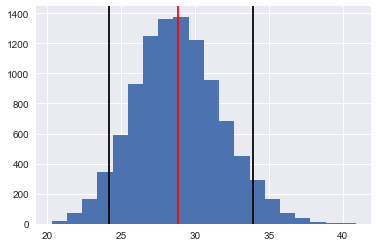

In [14]:
data = np.array([48,24,51,12,21,41,25,23,32,61,19,24,29,21,23,13,32,18,42,18])
xbar = np.empty((10000,))
for i in range(10000):
    sample = np.random.choice(data, size=20, replace=True)
    xbar[i] = sample.mean()
plt.hist(xbar,bins=20)
plt.axvline(xbar.mean(), color='r')
plt.axvline(np.percentile(xbar, 5), color='k')
plt.axvline(np.percentile(xbar, 95), color='k')
print("La moyenne de l'échantillon de départ est {:.2f}. La moyenne des moyennes est {:.2f}.".format(data.mean(), xbar.mean()))
print("L'intervalle de confiance obtenu par bootstrap à 5% est [{:5.2f} ; {:5.2f}]".format(np.percentile(xbar, 2.5), np.percentile(xbar, 97.5)))

tmp = t.ppf(0.975, 20-1) * np.sqrt(data.var(ddof=1)/20)
print("L'intervalle de confiance obtenu par le t de Student à 5% est [{:5.2f} ; {:5.2f}]".format(data.mean() - tmp, data.mean() + tmp))


# 7. Les tests statistiques

## 7.1. Principe de base

Un test statistique consiste à :
1. Poser un hypothèse $H_0$, nommée "hypothèse nulle".
2. Calculer, dans la gamme des résultats expérimentaux possibles, ceux qui sont _tellement éloignés_ du résultat moyen attendu selon $H_0$, que ces résultats n'ont _presque aucune chance de se produire si $H_0$ est vraie_.
3. Comparer ces résultats avec celui qui a été __réellement__ obtenu.
4. Conclure que $H_0$ est _peu crédible_ (et __la rejeter__) si le résultat obtenu appartient aux résultats _improbables_. Donner la résultat du test en indiquant la probabilité $P$ d'observer des résultats encore plus éloignés de celui attendu.
5. Conclure, au contraire, que $H_0$ reste _crédible_ (et __ne pas la rejeter__ ).

En science, le _presque aucune chance_ vaut 5%.

__Exemple : Où sont les hommes ?__

1. $H_0$ : "Le pourcentage de garçon parmi les futurs profs est de 50%"
2. Si cette hypothèse est correcte ($p_{garçon} = 50\%$) alors sur 50 étudiants, on observera un pourcentage inférieur à 36% ou supérieur à 64% dans moins de 5% des cas (i.e. $IC_{95\%} = [36.0~~,~~64.0\%]$)
3. __Or__ on constate qu'il y a seulement 5 garçons 
4. __Donc__ on rejette $H_0$

## 7.2 Détail des étapes d'un test

#### 7.2.1. Le choix de $H_0$

En gros, l'hypothèse $H_0$ doit permettre de rejeter l'absence de phénomène. Cette hypothèse est choisie de manière à pouvoir  connaître la distribution d'une certaine variable aléatoire de test (que je nommerais $T$).  

Exemple:
- "La moyenne de la population est _égale_ à la moyenne théorique."
- "Il y a _autant de_ mâles que de femelles dans la population."
- "Le pourcentage de gaucher est _identique_ chez les hommes et chez les femmes."
- "Le coefficient de corrélation entre la taille et le poids est _nul_."
- "L'azote n'a _aucun_ effet sur le rendement des gougnafier à fleurs bleues."

#### 7.2.2. Calcul de la zone de rejet de $H_0$

Connaissant la distribution de $T$, on peut déterminer quelles sont ses valeurs les plus extrêmes, les plus éloignées de la valeur moyenne attendue, autrement dit les valeurs qui n'ont presque aucune chance d'être observées  si $H_0$ est vraie.

On prend ensuite $1-\alpha \%$ des valeurs (les moins extrêmes). 

#### 7.2.3. Calcul de la variable de test

R.A.S.

#### 7.2.4. Verdict du test

Si l'observation n'est pas dans la zone de rejet, __on ne peut PAS conclure que $H_0$ est vraie.__

## 7.3 Comparaisons de moyennes

### 7.3.1. Comparaison entre moyenne observée et moyenne théorique

#### 7.3.1.1 Échantillon grand ($n>30$) : Test Z

Le Théorème Centrale limite nous dit que la moyenne suit une loi normale $\mathcal{N}(\mu,~~\sigma^2/n)$. Comme l'échantillon est grand, on peut remplacer $\sigma^2$ par $s^2$ la variance observée :

$$
m\rightarrow\mathcal{N}(\mu,~~s^2/n)
$$

Cette loi normale peut être centrée réduite (en $\mathcal{N}(0,~~1)$). On appelle $Z$ la variable centrée réduite.

$$
Z=\frac{m-\mu}{\sqrt{\frac{s^2}{n}}}~~\rightarrow\mathcal{N}(0,1)
$$

On a 95 % des valeurs de cette loi normale entre $[-1.96,~~1.96]$. 

On pose __l'hypothèse__ $H_0$ _"la moyenne du caractère dans l'échantillon est bien $\mu$"_. Si $H_0$ est vraie, $Z$ devrait se trouver dans l'intervalle $[-1.96,~~1.96]$.

__ - Si $|Z| > 1.96$, on rejette $H_0$ au risque $\alpha = 0.05$.__

__ - Si $|Z| < 1.96$, on ne rejette pas $H_0$, au risque $\beta$ inconnu.__  

__LA VALEUR P__ est la valeur minimal de $\alpha$ qu'il est possible d'adopter pour rejeter $H_0$

__Exemple : Taille moyenne observée (sur 70 étudiants)__

La taille moyenne des étudiants mâles est supposée de 176 cm. Peut-on dire que la taille moyenne des étudiants en BPE s'en écarte significativement ?

In [15]:
# Données
n = 70; m = 177.65; s2 = 40.6; mu = 176

Z = (m-mu)/np.sqrt(s2/n) # Z-test here
P = 2* (1-norm.cdf(Z))
print("La P-value de ce test est {:.2%}.".format(P))
print("\n".join(("L'hypothèse nulle est donc rejetée.",
               "On peut dire que les étudiant en BPE sont significativement plus grands que le reste des étudiants.")))

La P-value de ce test est 3.03%.
L'hypothèse nulle est donc rejetée.
On peut dire que les étudiant en BPE sont significativement plus grands que le reste des étudiants.


#### 7.3.1.2 Échantillon petit ($n<30$) mais suit une loi normale : test t de Student

La moyenne suit une loi normale (voir somme de variable aléatoire). __MAIS__ on ne peut pas remplacer $\sigma^2$ par $s^2$ (approximation trop forte). 

__DONC__ on se sert des tables de Student. On pose la variable $t$

$$
t=\frac{m-\mu}{\sqrt{\frac{s^2}{n}}}~~\rightarrow t(n-1 ~~\text{d.d.l.})
$$

On a 95 % des valeurs de cette loi normale entre $[-t_{crit},~~t_{crit}]$. $t_{crit}$ se trouve dans les __tables_.

On pose __l'hypothèse__ $H_0$ _"la moyenne du caractère dans l'échantillon est bien $\mu$"_. Si $H_0$ est vraie, $Z$ devrait se trouver dans l'intervalle $[-t_{crit},~~t_{crit}]$.

__ - Si $|Z| > t_{crit}$, on rejette $H_0$ au risque $\alpha = 0.05$.__

__ - Si $|Z| < t_{crit}$, on ne rejette pas $H_0$, au risque $\beta$ inconnu.__  

__LA VALEUR P__ est la valeur minimal de $\alpha$ qu'il est possible d'adopter pour rejeter $H_0$

__Exemple : Taille moyenne observée (sur 10 étudiants) __

La taille moyenne des étudiants mâles est supposée de 176 cm. Peut-on dire que la taille moyenne des étudiants en BPE s'en écarte significativement ?

In [16]:
# Données
n = 10; m = 177.65; s2 = 40.6; mu = 176

t_ = (m-mu)/np.sqrt(s2/n)
P = 2*(1-t.cdf(n-1, t_))
print("La P-value de ce test est {:.2%}.".format(P))
print("L'hypothèse nulle est donc PAS rejetée.")

La P-value de ce test est 10.26%.
L'hypothèse nulle est donc PAS rejetée.


#### 7.3.1.2 Échantillon petit ($n<30$)  avec loi quelconque 

__BOOTSTRAP <3__

### 7.3.2 Comparaison de deux moyennes observées

#### 7.3.2.1 Échantillon grand ($n > 30$) : test Z

Cette fois on travaille avec la __différence__ des deux moyennes observées $m_A$ et $m_B$. (Théroème Centrale Limite, Soustraction, Remplace les variances, on pose Z):

$$
Z=\frac{m_A-_B}{\sqrt{\frac{s_A^2}{n_A}+\frac{s_B^2}{n_B}}}~~\rightarrow\mathcal{N}(0,1)
$$

Puis __TEST Z__ !

__Exemple : 2 tailles de la main droite moyennes

Le groupe A est composé de 71 garçons. Le groupe B de 74 filles.

In [17]:
# Données
nA = 71; mA = 18.98; s2A = 1.26
nB = 74; mB = 17.59; s2B = 0.69

Z = (mA-mB)/np.sqrt(s2A/nA + s2B/nB)
P = 2* (1-norm.cdf(Z))
print("La P-value de ce test est {:.2%}.".format(P))
print("L'hypothèse nulle est donc rejetée.")

La P-value de ce test est 0.00%.
L'hypothèse nulle est donc rejetée.


#### 7.3.2.2 Échantillon petit ($n < 30$) mais loi normale : test t de Student

On travaille toujours avec la __différence__ des deux moyennes observées $m_A$ et $m_B$. Cette fois le souci vient de remplacer $\sigma^2$ par ces estimations $s_A^2$ et $s_B^2$. On pose donc une meilleur estimation :
$$
s^2 = \frac{s_A^2(n_A-1) + s_B^2(n_B-1)}{n_A+n_B-2}
$$

Puis on pose $t$ (__notez l'utilisation de__ $s^2$): 

$$
t=\frac{m_A-_B}{\sqrt{\frac{s^2}{n_A}+\frac{s^2}{n_B}}}~~\rightarrow t(n_A+n_B-2~~\text{d.d.l.})
$$

Puis __TEST t de Student__ !

__Exemple : 2 tailles de la main droite moyennes__

Le groupe A est composé de 8 garçons. Le groupe B de 7 filles.

In [18]:
# Données
nA = 8; mA = 18.98; s2A = 1.26
nB = 7; mB = 17.59; s2B = 0.69

s2 = (s2A * (nA-1) + s2B * (nB-1))/(nA + nB - 2)
t_ = (mA-mB)/np.sqrt(s2/nA + s2/nB)
P = 2* (1-t.cdf(nA+nB-2, t_))
print("La P-value de ce test est {:.2%}.".format(P))
print("L'hypothèse nulle est donc rejetée.")

La P-value de ce test est 0.17%.
L'hypothèse nulle est donc rejetée.


#### 7.3.2.3 Échantillon petit ($n < 30$) Et pas loi normale

__Voir Tests non paramêtriques__

### 7.3.3 Comparaison de plus de deux moyennes

__ANOVA ou Tests non paramêtriques__

# 8. Les tests non paramêtriques

## 8.1 Idée générale

On __réduit__ le besoin de __connaissance de la loi de distribution__ en même temps que __la puissance du test__. D'après Schwartz, on conserve au moins 80% de la puissance.

## 8.1 Comparaison de deux moyennes : Test $U$ de Mann et Whitney

Il peut remplacer à la fois le test $Z$ et le test $t$ de Student.

Soit 2 échantillons $A$ et $B$ d'effectif $n_A$ et $n_B$. On suppose $n_A > n_B$.

L'idée est de prendre chaque élément $x$ de $A$ et de le comparer à chaque élément $y$ de $B$. 
- Si $x>y$ alors on incrémente $U_{xy}~~+=~~1$
- Si $x<y$ alors on incrémente $U_{yx}~~+=~~1$
- Si $x=y$ alors on incrémente $U_{xy}~~+=~~0.5$ ET $U_{yx}~~+=~~0.5$

On peut vérifier que $U_{xy} + U_{yx} = n_A.n_B$.

Il faut ensuite lire $U_{table}$ dans la __table__ en fonction du $\alpha$ choisi.

- __Si $Min(U_{xy},~~U_{yx}) < U_{table}$, on rejette $H_0$ au risque $\alpha$ choisi__
- __Si $Min(U_{xy},~~U_{yx}) > U_{table}$, on ne rejette pas$H_0$ au risque $\beta$ inconnu__

__Exemple : Zoo__

In [19]:
from scipy.stats import mannwhitneyu
# Données
A = np.array([1, 1, 1, 1, 5, 6, 6, 8, 9, 12])
B =  np.array([1, 7, 7, 8, 10, 13, 15])

Umin, P = mannwhitneyu(A, B, alternative="less") # H1 : mA < mB
print("Umin vaut {:.2f}.".format(Umin))
print("La P-value de ce test est {:.2%}.".format(P))
print("L'hypothèse nulle est donc rejetée.")

Umin vaut 17.50.
La P-value de ce test est 4.62%.
L'hypothèse nulle est donc rejetée.


Si $n_A$ et $n_B > 30$, on peut se ramener à un test $Z$ !

En effet $U$ suit une loi normale $\mathcal{N}(U_0,~~\sigma^2$ avec $U_0 = \frac{n_A * n_B}{2}$, $\sigma^2$ :

$$
\sigma^2 = \frac{n_A.n_B.(n_A+n_B)}{12}
$$

Donc on pose

$$
Z = \frac{U - U_0}{\sqrt{\frac{n_A.n_B.(n_A+n_B)}{12}}} \rightarrow \mathcal{N}(0,~~1)
$$

__TEST Z !!!__


## 8.2. Comparaison de plus de deux moyennes : Test $H$ de Kruskall et Wallis

Il peut remplacer ANOVA (utile !).

Soit k échantillons $A, B...,K$ d'effectif $n_A,n_B..., n_K$. On note $N = n_A+n_B...+n_K$ et  $a_1,a_2...$ les valeurs de $A$ et ainsi de suite.

On trie l'ensemble des éléments $N$ et on attribue à chacun un __rang__. En cas d'égalité, on donne à tous le __rang moyen__.

On note $r_A$ le rang moyen des éléments de $A$. Le __rang moyen théorique__ vaut $R = (N+1)/2$.

Avec l'hypothèse $H_0$ _"tous les échantillons proviennent de la même population"_, on devrait avoir tous les rangs moyens observés proches de $R$. On calcule alors $H$:

$$
H = \frac{n_A(r_A-R)^2 + n_B(r_B-R)^2...+n_K(r_K-R)^2}{\frac{N(N-1)}{12}}
$$

Il faut ensuite lire les __tables__ pour savoir si le test est significatif.

## 8.3. Comparaison de pourcentages : test de conformité du $\chi^2$ 

From Wikipedia:
```
The chi-squared distribution (also chi-square or χ2-distribution) with k degrees of freedom is the distribution of a sum of the squares of k independent standard normal random variables.
```



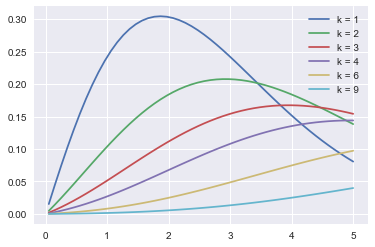

In [20]:
from scipy.stats import chi2
for k in [1,2,3,4,6,9]:
    plt.plot(x, chi2.pdf(k, x), label="k = {}".format(k))
plt.legend()

Dans le cas général, il s'agit d'une comparaison d'une répartition d'observations dans $k$ classes _mutuellement exclusives_.

On note $obs_i$ le nombre d'observations de la classe $i$. Ainsi on a:

$$
obs_1+obs_2...+obs_k = n~~\text{avec}~~n~~\text{nombre total d'observations.}
$$

Notre but est comparer la répartition observée et la répartition théoriques, on construit donc une variable qui donne l'écart à la théorie :

$$
\chi^2 = \frac{(obs_1 - théo_1)^2}{théo_1}+\frac{(obs_2 - théo_2)^2}{théo_2}+...+\frac{(obs_k - théo_k)^2}{théo_k}
$$

Cette variable suit une loi de distribution du $\chi^2$ __à certaines conditions__.

Il faut ensuite lire dans les __tables__ la valeur critique. __MAIS__ attention cette valeur du __nombre de degrés de liberté__.

Plusieurs cas sont possibles:
1. Les valeurs théoriques sont indépendantes des valeurs observées: $d.d.l. = k-1$
2. Dans le cas où les valeurs théoriques ont été obtenus grâce aux valeurs observées (exemple : allèles): $d.d.l. = k-2$ 

__Exemple : 80 individus, 4 classes, théo = [35, 25, 10, 10], obs = [40, 30, 6, 4]. Est-ce significatif ?__

In [21]:
from scipy.stats import chisquare
# Données
n = 40; k = 4
theo = [35, 25, 10, 10]; obs = [40, 30, 6, 4]

chisq, P = chisquare(obs, theo, ddof=0) # ddof final = k - 1 - ddof
print("La chi-2 de ce test est {:.2f}.".format(chisq))
print("La P-value de ce test est {:.2%}.".format(P))
print("L'hypothèse nulle n'est donc pas rejetée.")

La chi-2 de ce test est 6.91.
La P-value de ce test est 7.47%.
L'hypothèse nulle n'est donc pas rejetée.


## 8.4. Comparaison de pourcentages : test d'homogénéité du $\chi^2$ 

Maintenant on compare $N$ répartitions observées (dans $K$ classes toujours, $n$ le nombre total d'observations) !

__On remplace la répartition théorique par le meilleur estimateur : la répartition des observations réunies en 1 échantillon.__

$$
\text{Pour tout}~~k~~\text{on a}~~est_k = \frac{obs_{(1,~~k)}+obs_{(2,~~k)}+...+obs_{(N,~~k)}}{n}
$$

On pose ensuite :

$$
\chi^2 = \sum_{i=1}^{N}\frac{(obs_{(i,~~1)} - est_1 * n_i)^2}{est_1 * n_i}+\frac{(obs_{(i,~~2)} - est_2 * n_i)^2}{est_2 * n_i}+...+\frac{(obs_{(i,~~K)} - est_K * n_i)^2}{est_1 * n_K}
$$
On somme sur chaque répartition de chaque observation.

__ATTENTION aux degrés de liberté !!!__

Méthode rapide : $\text{d.d.l.}= (N-1)(k-1)$

On lit les __tables__ ensuite.

__Exemple : La latéralité est-elle indépendante du sexe ?__

Sur 616 sondés (308 hommes, 308 femmes), j'ai 57 gauchers parmi les hommes et 31 parmi les femmes.

Est-ce significatif ?

In [49]:
# Donnée
obs1 = np.array([57, n1-57])
n2 = 308; obs2 = np.array([31, n2-31])

def homogeneity_quisquare(*observed_counts):
    N = len(observed_counts); K = len(observed_counts[0])
    estimate_frequencies = np.add(*observed_counts) / sum(obs.sum() for obs in observed_counts)
    expected_counts = [obs.sum() * estimate_frequencies for obs in observed_counts]
    f_obs = np.hstack(observed_counts)
    f_exp = np.hstack(expected_counts)
    ddof = K+ N - 2
    return chisquare(f_obs, f_exp, ddof=ddof)

est = (obs1 + obs2) / n
theo1 = n1 * est; theo2 = n2 * est

chisq, P = homogeneity_quisquare(obs1, obs2)
print("La chi-2 de ce test est {:.2f}.".format(chisq))
print("La P-value de ce test est {:.2%}.".format(P))
print("L'hypothèse nulle est donc rejetée. i.e. c'est significatif.")

La chi-2 de ce test est 8.96.
La P-value de ce test est 0.28%.
L'hypothèse nulle est donc rejetée. i.e. c'est significatif.


## 8.5. Condition d'applications du $\chi^2$ 

_Pas applicable dans n'importe quelles conditions_. Il repose en effet sur une approximation puisque les effectifs des classes suivent des lois binomiales alors que le $\chi^2$ est la distribution d'une sommes de carrés de loi normale centrées réduites. __Il est nécessaire que toutes les binomiales en présence soient proches d'une loi normale, i.e. $np$ et $pq > 5$__.

Ou encore, __les effectifs théoriques de chaque classe doivent dépasser 5.__

# 9. Corrélation

## 9.1. Corrélation $\ne$ régression ?

En résumé, __corrélation__ et __régression__ permettent toutes deux de répondre à la question "y a-t-il un lien _statistique_ entre $X$ et $Y$". 
- __corrélation__ : "quelle est la __force__ de ce lien éventuel ?"
- __régression__ : "quelle est la __pente__ de la rélation éventuelle ?"

__IMPORTANT__   _"$X$ et $Y$ sont corrélées significativement."_ __NE SIGNIFIE PAS__  _"$X$ a un effet sur $Y$"_.

## 9.2 Covariance

From Wikipedia
```
    Covariance is a measure of the joint variability of two random variables.
```

La covariance mesure une évolution liée de deux variables aléatoires. 


$$
Cov(XY) = 0~~\text{si}~~X~~\text{et}~~Y~~\text{sont parfaitement indépendantes.}
$$
$$
Cov(XY) > 0~~\text{si}~~X~~\text{et}~~Y~~\text{sont positivement corrélées.}
$$
$$
Cov(XY) < 0~~\text{si}~~X~~\text{et}~~Y~~\text{sont négativement corrélées.}
$$
$$
\text{La valeur absolue de la covariance donne une image de la force de la corrélation}
$$

Seul __problème__ la valeur absolue de la covariance dépend des unités choisies pour les mesures !!! Impossible quantifier si la covariance est __significativement__ éloignée de zéro pour rejeter l'hypothèse de l'absence de corrélation.

## 9.3 Le coefficient de Pearson, $r$

$$
r = \frac{Cov(XY)}{s_X.s_Y}
$$

avec $s_X$ et $s_Y$ les écarts types des variables $X$ et $Y$.


$r$ est __indépendant des unités choisies__. Il varie entre $[-1,~~1]$,$-1$ et $1$ signifie une _rigidité_ totale entre $X$ et $Y$, i.e. si on connaît $X$, on connaît exactement $Y$ aussi. $0$ au contraire indique l'absence totale de lien.


__ATTENTION__ le $r$ calculé à partir de l'échantillon $\ne$ le coefficient _réel_ $\rho$. Il faut donc vérifier dans les __tables__ la signifiance de $r$ calculé.

Le nombre de degrés de liberté est $n-2$ avec $n$ le nombre de __couples__ de données.

__Exemple : $IC_{95\%}$ du $r$ de Pearson sous $H_0$ ("pas de lien entre $X$ et $Y$", ou "$r=0"$) pour $n=20$ ?__

In [23]:
from scipy.stats import rdist
n = 20
print("L'intervalle de confiance à 5% approximatif est [{:5.4f} ; {:5.4f}]".format(rdist.ppf(0.025, n-2), rdist.ppf(0.975, n-2)))

L'intervalle de confiance à 5% approximatif est [-0.4438 ; 0.4438]


__Remarque pour $n > 100$ :__

La variable suivante suit une loi $t$ de Student (à $n-2$ d.d.l.) si on a $n>100$:

$$
\frac{r}{\sqrt{1-r^2}}\sqrt{n-2}\rightarrow t_{(n-2~~\text{d.d.l.})}
$$

__LIMITES DU $r$ DE PEARSON__

Le $r$ de Pearson est conçu pour détecter une relation affine et monotone. Tout le reste est mal détecté !


## 9.4. $r^2$ : le coefficient de détermination

Ce coefficient représente _la proportion de la variance de $Y$ qui disparaît si on fixe $X$ (et vice versa)_.

